<h1>Analizando el conjunto de datos de la flor Iris</h1>

Tenemos un conjunto de datos de la flor Iris la cuál tiene diversas especies (Setoda, Versicolor, etc).

En el conjunto de datos tendremos 4 características:
* Longitud del sépalo
* Anchura del sépalo
* Longitud del pétalo
* Anchura del pétalo

Haremos primeramente un perceptron para entrenar y clasificar las diferentes especies de flores de Iris.

Repasaremos primero como funciona una neurona. 
![alt text](http://webspace.ship.edu/cgboer/neuronesp.gif)

La neurona recibe un señales eléctricas que llegan a las dendrites. Estas señales son entonces integradas en el cuerpo de la célula, y si las señales acumuladas exceden un cierto umbral, una señal de salida será generada, la cuál será transmitida por el axón. 

Hace unos pocos años, Frank Rosenblatt publicó el primer concepto de regla de aprendizaje de perceptron basado en el modelo de neurona MCP. Con esta regla perceptron, Rosenblatt propusó un algoritmo que automáticamente aprendería los coeficientes de peso que es multiplicado por la entrada para saber si la neurona envia la señal, es decir, si sobrepasa el umbral.

Nos basaremos un algoritmo de <strong>aprendizaje supervisado</strong>, es decir, a partir de muchas muestras entrenaremos a nuestro algoritmo de tal manera que sea capaz de predecir que especie de flor de Iris le estoy proporcionando sin saber explicitamente a que especie pertenece.



De momento nos centraremos en que solo hay dos especies de flor Iris por lo tanto es un problema de clasificación binaria dónde tendremos dos clases, "1 - clase positiva" y "-1 - clase negativa). Definiremos una función de activación φ(z), que combinara el valor de la entrada con la de los pesos, y nos dará una de las dos clases ya mencionadas.

Si la salida de nuestra función de activación, es mayor que nuestro umbral θ (que habremos definido previamente), entonces la clase será 1, de lo contrario será -1. En el perceptron la función de activación es un único paso.

Ahora implementaremos la clase perceptron, la cuál tendrá dos métodos principales que son el método fit y el método predict.


In [3]:
import numpy as np
class Perceptron(object):
    """Perceptron classifier.
    Parámetros
    ---------
    eta: float
        Learning rate (entre 0.0 y 1.0)
    n_iter: int
        Pasos sobre el training dataset
    
    Atributos
    ---------
    w_: 1d-array
        Pesos después de fitting
    errors_: list
        Número de clasificaciones erroneas en cada epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fir training data.
        
        Parámetros
        ----------
        X: {array-like}, shape = [n_samples, n_features]
        Training vectors, dónde n_samples es el número de muestras 
        y n_features es el número de características
        
        y: array-like, shape = [n_samples]
            Valores objetivo
            
        Returns
        -------
        self: object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label después unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Ahora podemos inicializar nuestro percetron utilizando un rango de aprendizaje que le propocionaremos que es la variable eta y el número de epochs (pasos sobre el conjunto de entrenamiento) el cuál es la variable n_iter. Mediante el método fit, inicializaremos los pesos en el vector self.w_. 

Para probar nuestra implementación de perceptron, cargarémos dos clases de fores, Setoda y Versicolor del conjunto de datos de Iris. Aunque la regla perceptron no está restringida a dos dimensiones, únicamente consideramos las dos características de longitud de sépalo y longitud de pétalo para propositos de visualización. Aunque solo utilizamos dos clases de flores, el perceptron puede ser extendido a clasificación de multiples clases.

Ahora obtendremos las flores:


In [4]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)


In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Extraemos las primeras 100 muestras de flores, 50 Iris-Setosa y 50 Iris-Versicolor respectivamente.

In [6]:
#Queremos los primeros 100 y solo la columna 4
y = df.iloc[0:100, 4]
print (y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
           ...       
70    Iris-versicolor
71    Iris-versicolor
72    Iris-versicolor
73    Iris-versicolor
74    Iris-versicolor
75    Iris-versicolor
76    Iris-versicolor
77    Iris-versicolor
78    Iris-versicolor
79    Iris-versicolor
80    Iris-versicolor
81    Iris-versicolor
82    Iris-versicolor
83    Iris-versicolor
84    Iris

Convertiremos las primeras 100 muestras a 1(Iris-Versicolor) y -1 (Iris-Setosa). 

In [7]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
print (y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


Ahora entrenamos nuestro perceptron y mostramos los resultados:

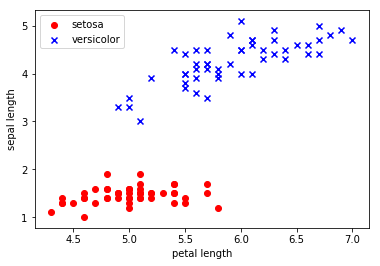

In [8]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

Ahora miraremos el número de pasos hasta comprobar si el algoritmo converge y encuentra un límite de decisión que separa las dos clases:

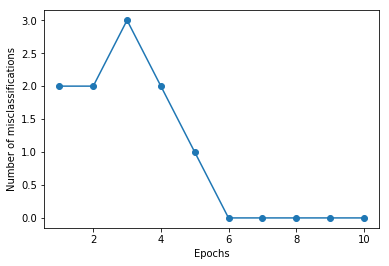

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

Vemos que nuestro <strong>perceptron</strong> ha convergido después del sexto <strong>epoch</strong> y debería ahora ser capaz de clasificar las muestras del entrenamiento perfectamente. Implementaremos una función para visualizar los límites de decisión para conjuntos 2D:

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)       

Ahora utilizamos la función para pintar las dos zonas separadas:

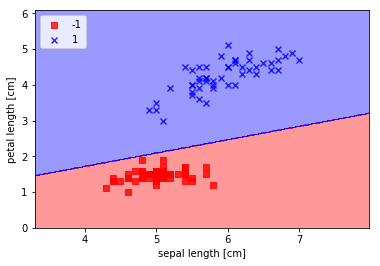

In [11]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Como podemos ver en el trazado, el <strong>perceptron</strong> ha aprendido un límite de decisión que ha sido capaz de clasificar todas las muestras de flores Iris en el subconjunto de entrenamiento,

Aunque nuestro <strong>perceptron</strong> ha clasificado las dos clases de flores perfectamente, la convergencia es uno de los mayores problemas del <strong>perceptron</strong>. Frank Rosenblatt provó matemáticamente que la regla de aprendizaje del perceptron converge si las dos clases pueden estar separadas por un hiperplano lineal. Sin embargo, si las clases no pueden estar separadas perfectamente por tal límite de decisión lineal, los <strong>pesos</strong> nunca pararán de actualizarse si no establecemos un máximo número de <strong>epochs (pasos)</strong>.

<h2>Neuronas lineales Adaptativas</h2>

Ahora observaremos otro tipo de red neuronal de una sola capa: Neurona Lineal ADAptativa (Adaline). Adaline fue publicado, unicamente unos pocos años después de nuestro algoritmo perceptron de Frank Rosenblatt, por Bernard Widrow y puede ser considerado una mejora del anterior.

El algoritmo <strong>Adaline</strong> ilustra el concepto de definir y minimizar las funciones de coste, lo cuál sentará las bases para el entendimiento más avanzado para algoritmos de machine learning para clasificación, tales como regresión logística y 'support vector machines'.

La diferencia clave entre la regla <strong>Adaline</strong> (también conocida como la regla Widrow-Hoff) y el perceptron de Rosenblatt es que los pesos son actualizados basados en la función de activación linea en lugar de una función de único paso como en el perceptron.

En <strong>Adaline</strong> esta función de activación lineal φ(z) es simplemente la función identidad de la entrada neta, así que:

φ((w^T) * x) = (w^T) * x

Vemos que además de la función de activación lineal usada para que los pesos aprendan, tenemos un <strong>quantizer</strong> el cuál es similar a la función de un único paso que hemos visto anteriormente. 

![alt text](https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png)


In [12]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier
            Parameters
        ----------
        eta: float
            Learning rate (between 0.0 and 1.0)
        n_iter: int
            Pasos sobre el training dataset
            
        Attributes
        ----------
        w_: 1d-array
            Pesos después del ajuste
        errors_: list
            Número de clasificaciones erroneas en cada epoch
            
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data.
            
            Parámetros
            ----------
            X: {array-like}, shape = [n_samples, n_features]
                Training vectors,
            dónde n_samples es el número de muestras y n_features 
            es el número de características
            
            y: array-like, shape = [n_samples]
                Target values.
        
            Returns
            -------
            self: object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label después unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

En lugar de ir actualizando los pesos, lo que haremos es calcular el gradiente basado en conjunto de datos de entrenamiento. Utilizaremos dos buenas tasas de aprendizaje η para una convergencia óptima. Así que elegiremos η = 0.1 y η = 0.0001 para comenzar.

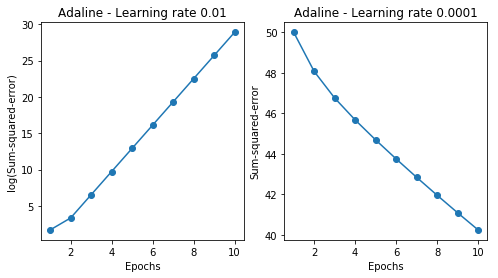

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

Vemos que en el gráfico izquierdo que la tasa de aprendizaje es demasiada grande, en lugar de minimizar la función de coste, el error se vuelve más grande en cada epoch.

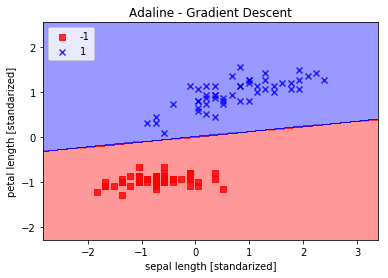

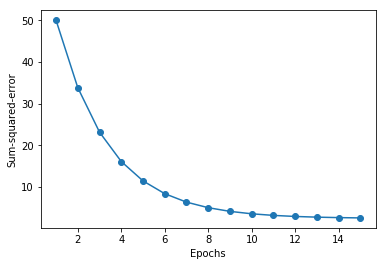

In [16]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standarized]')
plt.ylabel('petal length [standarized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

Acabamos de ver como converge Adaline después de entrenar las características estandarizadas usando la tasa de aprendizaje η = 0.01.